In [1]:
from gwosc.datasets import find_datasets
events = find_datasets(type="event")
print(events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200214_224526-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 

In [2]:
event_id="GW150914"
from gwosc.datasets import event_gps
gps = event_gps(event_id)
print(gps)

1126259462.4


By default, the `get_event_urls` function returns all of the files associated with a given event, which isn't particularly helpful. However, we can filter any of these by using keayword arguments, for example, to get the URL for the 32-second file for the LIGO-Livingstion detector:

In [3]:
from gwosc.locate import get_event_urls
urls_L1 = get_event_urls(event_id, duration=32, detector = "L1")
print(urls_L1)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


The same thing for Hanford's detector

In [4]:
urls_H1 = get_event_urls(event_id, duration=32, detector="H1")
print(urls_H1)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


We could have chosen any of:

* "G1" - GEO600
* "H1" - LIGO-Hanford
* "L1" - LIGO-Livingston
* "V1" - Virgo

In the future, the Japanese observatory KAGRA will come online with "K1"

## Imports

In [11]:
import os
import urllib
import h5py

# Plotting
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [12]:
# Download function
def download(url):
    filename = url.split("/")[-1]
    if not os.path.isfile(filename):
        print(f"Downloading + {url}")
        urllib.request.urlretrieve(url, filename)
        print("File download complete")
    else:
        print("Already downloaded")
    return filename

### Download an HDF5 data file

In [13]:
url = urls_H1[0]
filename_h = download(url)

Already downloaded


In [14]:
url = urls_L1[0]
filename_l = download(url)

Already downloaded


Already downloaded


Text(0, 0.5, 'H1 Strain')

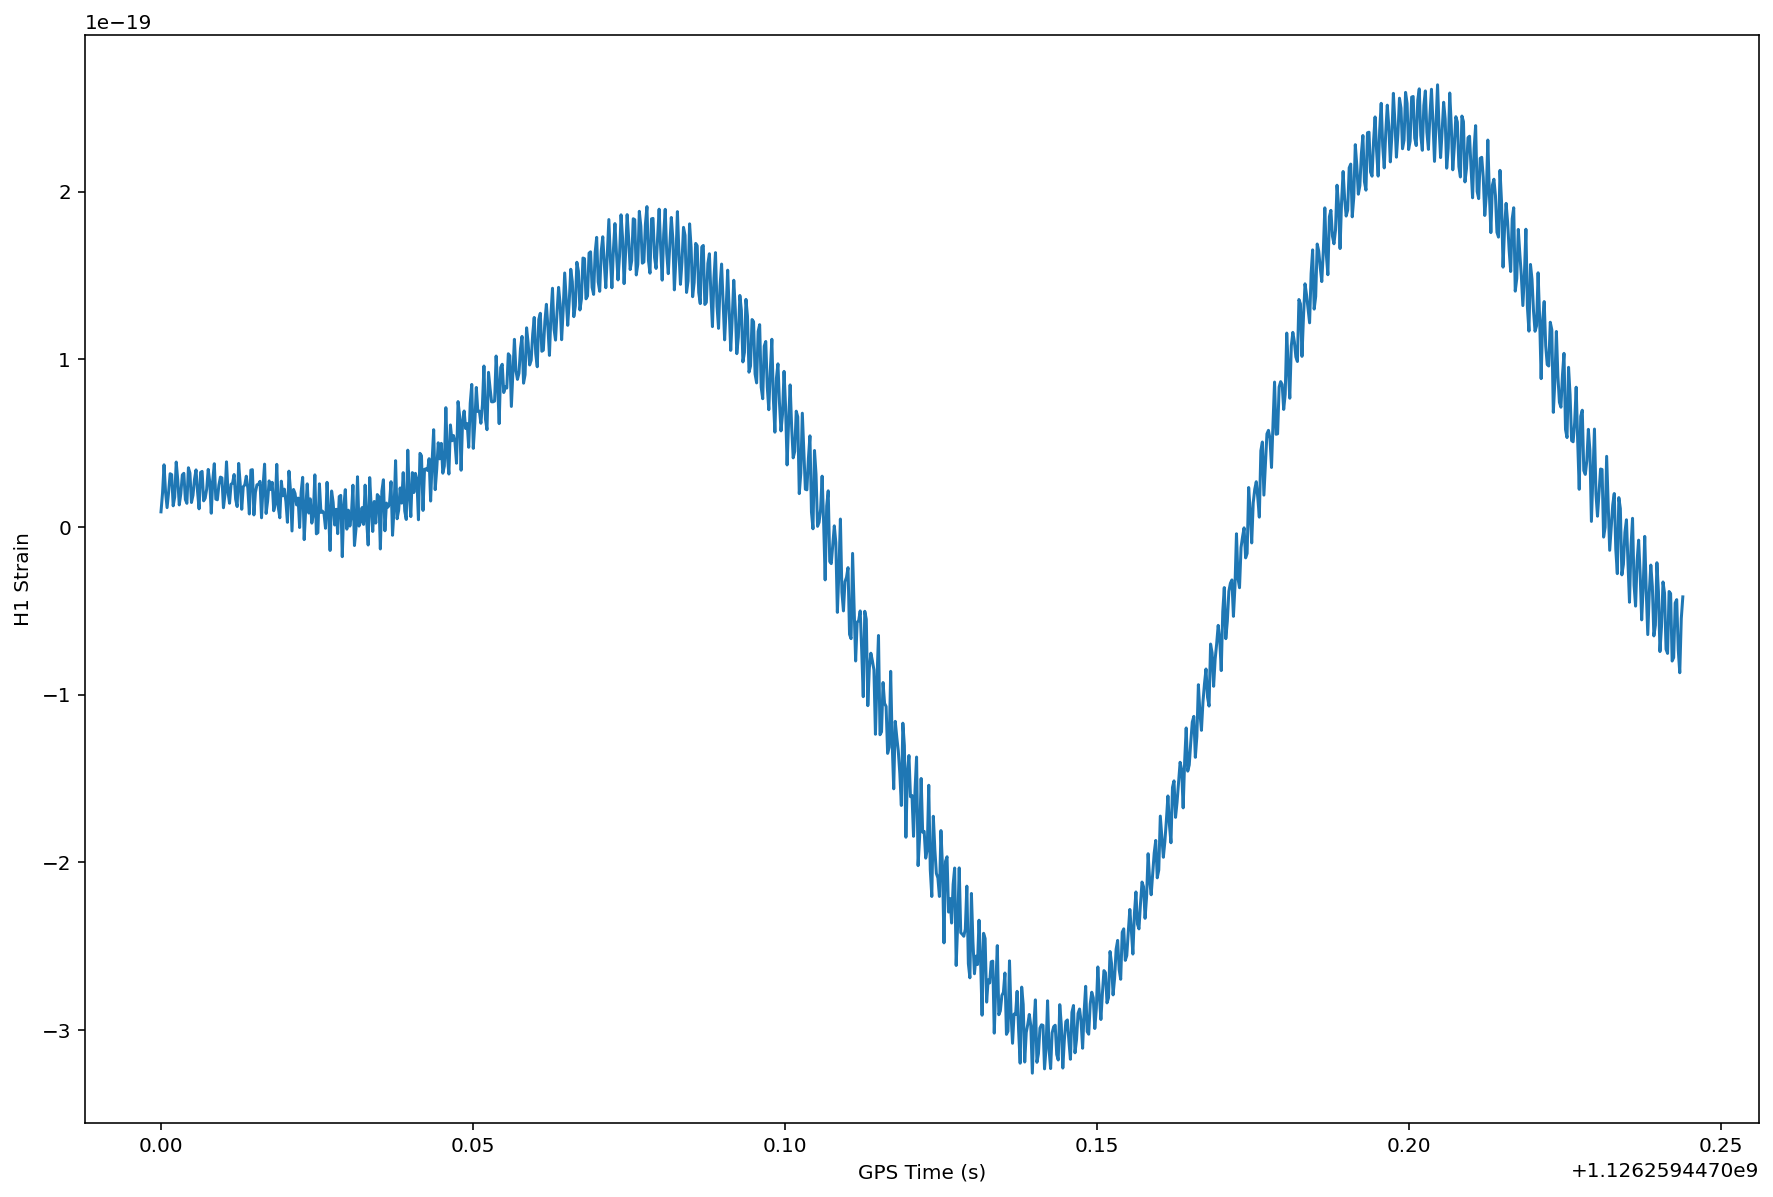

In [23]:

download("https://losc.ligo.org/s/sample_code/readligo.py")
import readligo as rl
# Use the loaddata() method here to load strain data
strain_h, time, dq = rl.loaddata(filename_h, "H1")

# Plot the first 1000 samples fo strain vs. time here
numSamples = 1000
plt.figure(figsize = (15,10))
plt.plot(time[0:numSamples], strain_h[0:numSamples])
plt.xlabel("GPS Time (s)")
plt.ylabel("H1 Strain")

Text(0, 0.5, 'L1 strain')

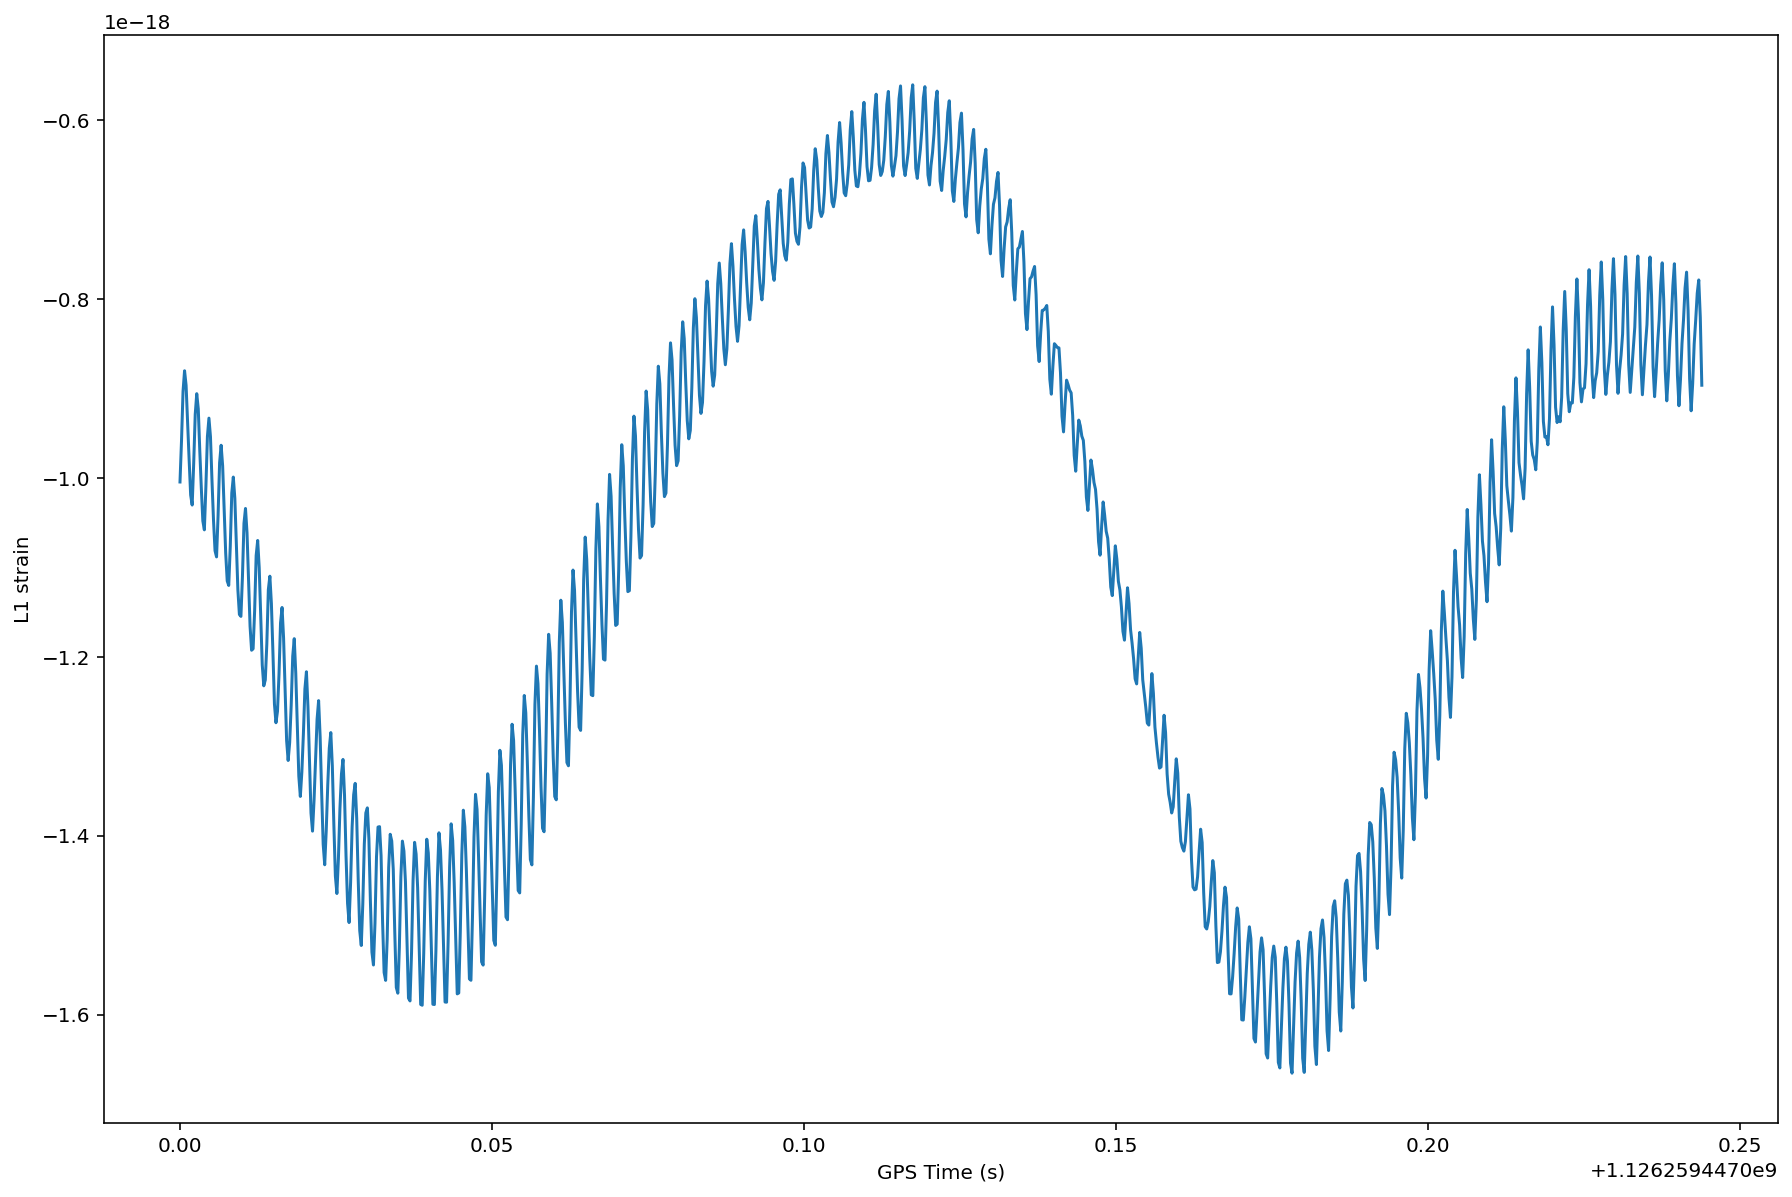

In [25]:
# Use the loaddata() here to load strin data
strain_l, time, dq = rl.loaddata(filename_l, "L1")

# Plot the first 100 samples of strain vs. time here
numSamples = 1000
plt.figure(figsize=(15,10))
plt.plot(time[0:numSamples], strain_l[0:numSamples])
plt.xlabel("GPS Time (s)")
plt.ylabel("L1 strain")

In [26]:
strain_l.shape

(131072,)

In [28]:
import pandas as pd
df = pd.DataFrame(index=time)
df.index.name = "gps_time"
df["L1"]=strain_l
df["H1"]=strain_h
df.head()

,L1,H1
gps_time,,
1.126259e+09,-1.004326e-18,9.067309e-21
1.126259e+09,-9.581150e-19,2.011789e-20
1.126259e+09,-9.030594e-19,3.712905e-20
1.126259e+09,-8.800127e-19,2.090712e-20
1.126259e+09,-8.962525e-19,1.159864e-20


In [29]:
filename_l

'L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5'

In [32]:
filename_csv = filename_l.replace("L-L1_","").replace(".hdf5", ".csv")
if not os.path.isfile(filename_csv):
    df.to_csv(filename_csv, header=True, sep=",")

Let's do some plotting with plotly

<AxesSubplot:>

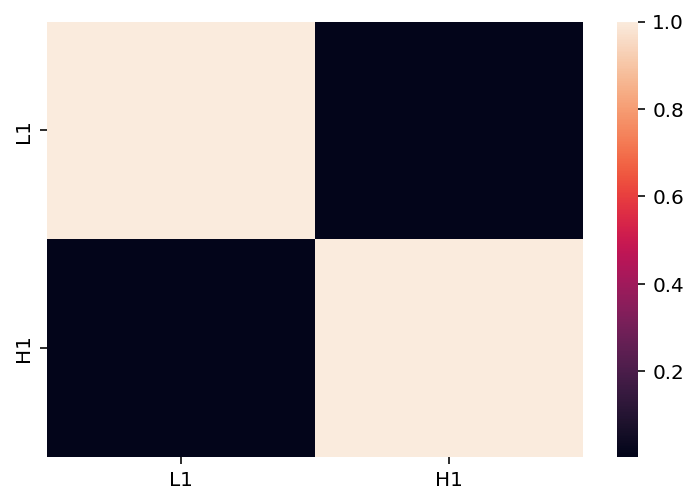

In [37]:
# import chart_study.plotly as py
sns.heatmap(df.corr())

This is the reason why youi wanted me to install all the garbagio modules. I refuse. No correlation or is there???????????????????????????

## Fourier Transoform
examples "borrowed" from [here](https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/).

The Fourier transform is commonly used to convert a signal in the time spectrum to a frequency spectrum. Examples of time spectra are sound wavesm electricity, mechanical vibrations et. The figure below shows 0.25 seconds of Kendrick's tune. As can be seen it looks like a wave with different frequencies. It looks like multiple waves

![alt text denied](https://www.ritchievink.com/img/post-5-fft/fig_1.png "Example of time domain signal captured on a potato")

This is where the Fourier Transformation comes in. This method makes use of the fact that every non-linear function can be represented as a sum of (infinite) sine waves. In the underlying figure this is illustrated, as a step function is simulated my a multitude of sine waves.

![NO ALT TEXT FOR YOU!](https://www.ritchievink.com/img/post-5-fft/fig_2.png "Step function simulated with sine waves")


 A fourier tranform will break apart a time signal and will return information about the frequency of all sine waves needed to simulate that time signal. For sequences of evenly spaced values the Discrete Fourier Transform (DFT) is defined as:
 
 $$X_k = \sum_{n=0}^{N-1}x_n e^{\frac{-2\pi ikn}{N}}$$
 
 Where:
 * $N$ = number of samples
 * $n$ = current sample
 * $x_n$ = value of the signal in sample n
 * $k$ = current frequency (0 Hz to N-1 Hz)
 * $X_k$ = result of the DFT (amplitude and phase)
 
 Note that a dot product is defined as:
 
 $$a \cdot b = \sum_{n=1}^{n}a_ib_i$$


A DFT algorithm can thus be written as:

In [39]:
import numpy as np
def DFT(x):
    """
    Compute the discrete Fourier Transformation of the 1D arrax x
    :param x: (array)
    """
    
    N = x.size
    n = np.arange(N)
    k = n.reshape(N, 1)
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

However if we run this code on our time it takes 256gb of memory for some goddam reason. And apparently it takes 10 seconds to compute. But I wouldn't know because I don't have 256 gb of ram. 

Luckily some clever guys [(Cooley and Tukey)](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) have come up with the Fast Fourier Transform (FFT) algorithm which recursively divides the DFT in smaller DFTs bringing down the needed computation time. A standard DFT scales O($N^2$) while the FFT scales O($N \cdot log(N)$).

### The Discrete Fourier Transform

Let's consider a digital signal $x$ represented by a vector $(x_0, .., x_{N-1})$. We assume that this signal is regularly sampled. The **Discrete Fourier Transform (DFT)** of $x$ is $X = (X_0, .., X(N-1))$ defined as:

$$\forall k \in \{0,\ldots,N-1\}, \quad X_k = \sum_{n=0}^{N-1} x_e^{\frac{-2i\pi kn}{N}}$$.

The  DFT can be computed efficiently with the **Fast Fourier Transform (FFT)**, an algorithm that exploits symmetries and redundancies in this definition to considerably speed up the computation. The complexity of the FFT is $O(N \cdot \log(N))$ instead of $O(N^2)$ for the naive DFT. The FFT is one of the most important algorithms of the digital universe.

Here is an intuitive explanation of what the DFT describes: Instead of representing our signal on a real line, let's represent it on a circle. We can play the whole signal making 1, 2, or any number $k$ of laps on the circle. Therefore, when $k$ is fixed, we represent each value $x_n$ of the signal with an angle $\frac{2 \pi k n}{n}$ and a distance from the original equal to $x_n$.

In the following figure, the signal is a sine wave at the frequency $(f = 3 Hz)$. The points of this signal are in blue, positioned at an angle $\frac{2 \pi k n}{N}$. Their algebraic sum in the complex plane is in red. These vectors represent the different coefficients on the signal's DFT.
![](https://ipython-books.github.io/pages/chapter10_signal/01_fourier_files/fourier.png)

The next figure shows the previous signal's **power spectral density (PSD)**:
![No image is here](https://ipython-books.github.io/pages/chapter10_signal/01_fourier_files/fourier_bis.png)

By considering all possible frequencies, we have an exact representation of our digital signal in the frequency domain. We can recover the initial signal with an **Inverse Fast Fourier Transform** that computes an **Inverse Discrete Fourier Transform**. The Formula is very similar to the DFT:

$$\forall k \in \{0, \ldots, N-1\} \quad x_k = \frac{1}{N} \sum_{n=0} X_n e^{\frac{2i\pi kn}{N}}$$

The DFT is useful when periodic patterns are to be found. However, generally speaking, the Fourier transform cannot detect *transient* changes at specific frequencies. Local spectral models are required, such as the **wavelet transform**.

#### There's more:

The following links contain more details about Fourier transforms:

* [short example](https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example)
* [Introductions to the FFT with SciPy, available at](http://scipy-lectures.github.io/intro/scipy.html#fast-fourier-transforms-scipy-fftpack)